In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import plotly.express as px

In [233]:
dataset = pd.read_csv("C:/Users/hevas/Downloads/sales.csv", sep=',')

dataset.head()

,InvoiceNo,Date,Country,ProductID,customerID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice,quantity
0,52389,1/01/2014,United Kingdom,2152,6464,UK2,Male,11.0,37,10.5,159,0.0,2014,1,159.0,7
1,52390,1/01/2014,United States,2230,8994,US15,Male,11.5,35,11.0,199,0.2,2014,1,159.2,7
2,52391,1/01/2014,Canada,2160,7247,CAN7,Male,9.5,43,9.0,149,0.2,2014,1,119.2,2
3,52392,1/01/2014,United States,2234,8721,US6,Female,9.5,38,7.5,159,0.0,2014,1,159.0,8
4,52393,1/01/2014,United Kingdom,2222,5162,UK4,Female,9.0,36,7.0,159,0.0,2014,1,159.0,1


In [234]:
dataset.shape

(14967, 16)

In [235]:
dataset.isnull().sum()

InvoiceNo        0
Date             0
Country          0
ProductID        0
customerID       0
Shop             0
Gender           0
Size (US)        0
Size (Europe)    0
Size (UK)        0
UnitPrice        0
Discount         0
Year             0
Month            0
SalePrice        0
quantity         0
dtype: int64

In [236]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InvoiceNo      14967 non-null  int64  
 1   Date           14967 non-null  object 
 2   Country        14967 non-null  object 
 3   ProductID      14967 non-null  int64  
 4   customerID     14967 non-null  int64  
 5   Shop           14967 non-null  object 
 6   Gender         14967 non-null  object 
 7   Size (US)      14967 non-null  float64
 8   Size (Europe)  14967 non-null  int64  
 9   Size (UK)      14967 non-null  float64
 10  UnitPrice      14967 non-null  int64  
 11  Discount       14967 non-null  float64
 12  Year           14967 non-null  int64  
 13  Month          14967 non-null  int64  
 14  SalePrice      14967 non-null  float64
 15  quantity       14967 non-null  int64  
dtypes: float64(4), int64(8), object(4)
memory usage: 1.8+ MB


In [237]:
#convertir columna date a tipo fecha(datetime64) ya que se encuentra como object
dataset['Date'] = dataset['Date'].astype('datetime64[ns]')

#convertir tipo de dato a object para la columna productID ya que no se tiene el nombre del producto
#dataset['ProductID'] = dataset['ProductID'].astype('object')

#agregamos la columna total al dataset
dataset['Total'] = dataset['quantity']*dataset['SalePrice']

C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning:

Parsing '13/01/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning:

Parsing '14/01/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning:

Parsing '15/01/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning:

Parsing '16/01/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\pandas\core\tools\date

In [238]:
dataset['aniomes']   =dataset['Date'].dt.strftime('%Y%m')
dataset['anio']      = dataset['Date'].dt.strftime('%Y')
dataset['codfecha']   = dataset['Date'].dt.strftime('%Y%m%d')
dataset['trimestre'] = dataset['Date'].dt.quarter

In [239]:
dataset

,InvoiceNo,Date,Country,ProductID,customerID,Shop,Gender,Size (US),Size (Europe),Size (UK),...,Discount,Year,Month,SalePrice,quantity,Total,aniomes,anio,codfecha,trimestre
0,52389,2014-01-01,United Kingdom,2152,6464,UK2,Male,11.0,37,10.5,...,0.0,2014,1,159.0,7,1113.0,201401,2014,20140101,1
1,52390,2014-01-01,United States,2230,8994,US15,Male,11.5,35,11.0,...,0.2,2014,1,159.2,7,1114.4,201401,2014,20140101,1
2,52391,2014-01-01,Canada,2160,7247,CAN7,Male,9.5,43,9.0,...,0.2,2014,1,119.2,2,238.4,201401,2014,20140101,1
3,52392,2014-01-01,United States,2234,8721,US6,Female,9.5,38,7.5,...,0.0,2014,1,159.0,8,1272.0,201401,2014,20140101,1
4,52393,2014-01-01,United Kingdom,2222,5162,UK4,Female,9.0,36,7.0,...,0.0,2014,1,159.0,1,159.0,201401,2014,20140101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14962,65773,2016-12-31,United Kingdom,2154,3269,UK2,Male,9.5,42,9.0,...,0.0,2016,12,139.0,5,695.0,201612,2016,20161231,4
14963,65774,2016-12-31,United States,2181,6622,US12,Female,12.0,40,10.0,...,0.0,2016,12,149.0,3,447.0,201612,2016,20161231,4
14964,65775,2016-12-31,Canada,2203,8382,CAN6,Male,10.5,36,10.0,...,0.3,2016,12,125.3,5,626.5,201612,2016,20161231,4
14965,65776,2016-12-31,Germany,2231,9376,GER1,Female,9.5,42,7.5,...,0.0,2016,12,199.0,4,796.0,201612,2016,20161231,4


# Analisis exploratorio

In [241]:
dataset.describe()

,InvoiceNo,ProductID,customerID,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice,quantity,Total,trimestre
count,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000
mean,59050.261509,2195.325115,5554.323645,9.195630,39.957707,8.089497,164.171377,0.124013,2015.308211,6.689517,143.987913,4.482929,645.627527,2.558429
std,3889.598714,27.633526,2321.154528,1.511719,3.139483,1.970014,22.940544,0.170112,0.762320,3.319909,35.180799,2.295482,375.252373,1.098048
min,52389.000000,2147.000000,1545.000000,4.500000,35.000000,2.500000,129.000000,0.000000,2014.000000,1.000000,64.500000,1.000000,64.500000,1.000000
25%,55648.500000,2172.000000,3532.000000,8.000000,37.000000,6.500000,149.000000,0.000000,2015.000000,4.000000,125.100000,2.000000,338.000000,2.000000
50%,59092.000000,2195.000000,5525.000000,9.000000,40.000000,8.500000,159.000000,0.000000,2015.000000,7.000000,149.000000,4.000000,597.000000,3.000000
75%,62433.000000,2219.000000,7581.500000,10.000000,43.000000,9.500000,179.000000,0.200000,2016.000000,10.000000,169.000000,6.000000,907.200000,4.000000
max,65777.000000,2242.000000,9550.000000,15.000000,45.000000,14.500000,199.000000,0.500000,2016.000000,12.000000,199.000000,8.000000,1592.000000,4.000000


Total                       
               count        sum        mean
Country                                    
Canada          2952  1935524.5  655.665481
Germany         4392  2828720.4  644.062022
United Kingdom  1737  1126956.6  648.794819
United States   5886  3771905.7  640.826656

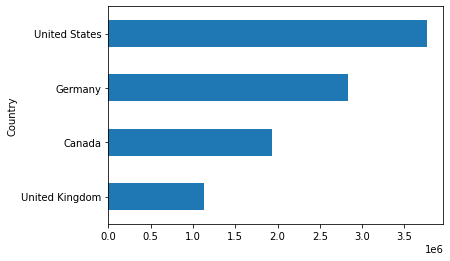

In [242]:
#Total por Country
dataset.groupby('Country').sum()["Total"].sort_values(ascending=True).plot(kind='barh')

dataset[['Total','Country']].groupby(['Country'], as_index=False).agg(['count','sum','mean'])

Total                       
     count        sum        mean
Shop                             
CAN1   372   236788.4  636.527957
CAN2   438   284838.8  650.316895
CAN3   435   287322.0  660.510345
CAN5   411   276925.6  673.784915
CAN6   861   563690.9  654.693264
CAN7   435   285958.8  657.376552
GER1  1836  1166298.0  635.238562
GER2  1947  1273559.1  654.113559
GER3   609   388863.3  638.527586
UK1    345   225120.1  652.522029
UK2    345   222281.7  644.294783
UK3    372   244728.9  657.873387
UK4    351   215819.3  614.869801
UK5    324   219006.6  675.946296
US1    234   149781.7  640.092735
US10   216   128180.3  593.427315
US11   180   124767.8  693.154444
US12   972   632238.9  650.451543
US13  1011   637189.1  630.256281
US14   633   404983.2  639.783886
US15  1044   670605.3  642.342241
US2    150    92299.2  615.328000
US3    207   134274.3  648.668116
US4    180   116860.3  649.223889
US5    192   120503.8  627.623958
US6    225   139449.8  619.776889
US7    222   156025.3  702.816667
US8    225   140294.1  623.529333
US9    195   124452.6  638.218462

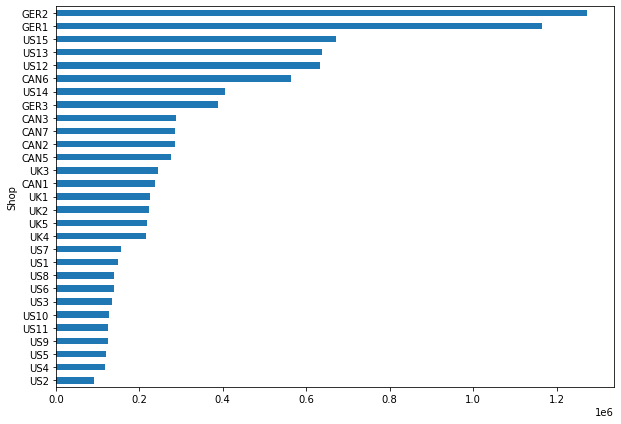

In [244]:
#Total por shop
dataset.groupby('Shop').sum()["Total"].sort_values(ascending=True).plot(kind='barh',figsize =(10, 7))

dataset[['Total','Shop']].groupby(['Shop'], as_index=False).agg(['count','sum','mean'])

Total                         
     count         sum         mean
Year                               
2014  2753   4131121.3  1500.588921
2015  4848   7583614.9  1564.277001
2016  7366  11062171.4  1501.788135

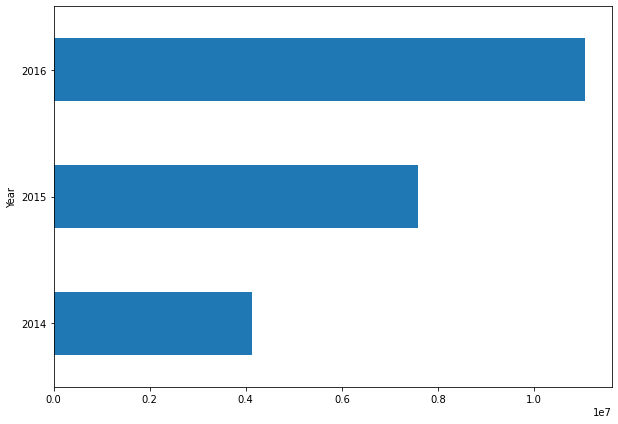

In [117]:
#Total por Gender
dataset.groupby('Year').sum()["Total"].sort_values(ascending=True).plot(kind='barh',figsize =(10, 7))

dataset[['Total','Year']].groupby(['Year'], as_index=False).agg(['count','sum','mean'])

Total                       
       count        sum        mean
Gender                             
Female  6048  3924976.0  648.970899
Male    8919  5738131.2  643.360377

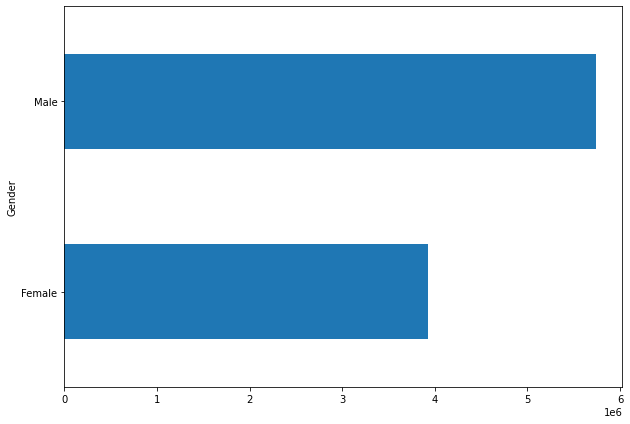

In [245]:
#Total por Gender
dataset.groupby('Gender').sum()["Total"].sort_values(ascending=True).plot(kind='barh',figsize =(10, 7))

dataset[['Total','Gender']].groupby(['Gender'], as_index=False).agg(['count','sum','mean'])

In [248]:
#enviamos la columan date como index
dataset.set_index("Date", inplace=True)

In [249]:
dataset.Country.unique()

array(['United Kingdom', 'United States', 'Canada', 'Germany'],
      dtype=object)

In [ ]:
#*************Crear nuevo dataset filtrado por country and shop
#dataset_us = dataset[(dataset['Country'] == 'Canada') & (dataset['Shop'] == 'CAN1')]

In [250]:
# crear nuevo dataset filtrado por Country
dataset_us = dataset[dataset['Country'] >= 'United States']
dataset_us.head()

,InvoiceNo,Country,ProductID,customerID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice,quantity,Total,aniomes,anio,codfecha,trimestre
Date,,,,,,,,,,,,,,,,,,,,
2014-01-01,52390,United States,2230,8994,US15,Male,11.5,35,11.0,199,0.2,2014,1,159.2,7,1114.4,201401,2014,20140101,1
2014-01-01,52392,United States,2234,8721,US6,Female,9.5,38,7.5,159,0.0,2014,1,159.0,8,1272.0,201401,2014,20140101,1
2014-01-01,52394,United States,2173,4693,US15,Male,10.5,35,10.0,159,0.0,2014,1,159.0,4,636.0,201401,2014,20140101,1
2014-02-01,52397,United States,2191,9541,US13,Male,10.5,40,10.0,139,0.0,2014,1,139.0,4,556.0,201402,2014,20140201,1
2014-02-01,52399,United States,2197,6395,US1,Male,10.0,43,9.5,129,0.0,2014,1,129.0,4,516.0,201402,2014,20140201,1


In [251]:
total_dataset_us = dataset_us
total_dataset_us.set_index("aniomes", inplace=True)

In [252]:
total_dataset_us = total_dataset_us[['Total']].groupby(level = 0).sum()
total_dataset_us

,Total
aniomes,
201401,68574.7
201402,49298.9
201403,53807.0
201404,50413.5
201405,53041.3
201406,57325.5
201407,43226.9
201408,42111.1
201409,58121.8


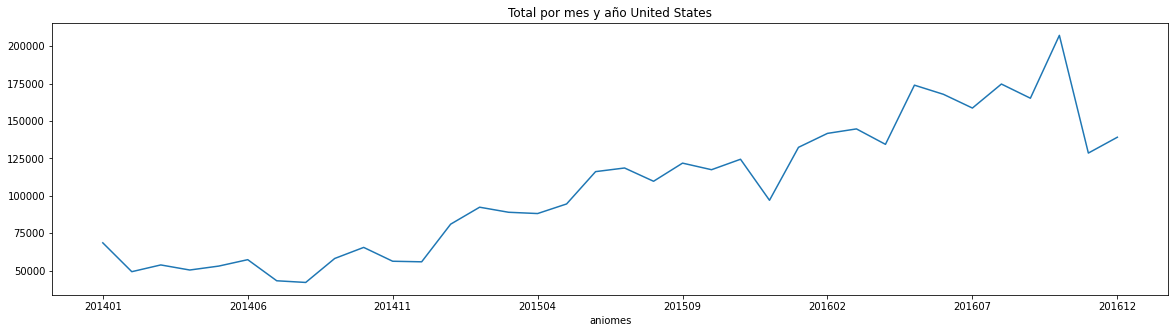

In [253]:
total_dataset_us.Total.plot(figsize=(20,5), title = "Total por mes y año United States")
plt.show()

In [254]:
# crear nuevo dataset filtrado por Country
dataset_gm = dataset[dataset['Country'] >= 'Germany']
dataset_gm.head()

,InvoiceNo,Country,ProductID,customerID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice,quantity,Total,aniomes,anio,codfecha,trimestre
Date,,,,,,,,,,,,,,,,,,,,
2014-01-01,52389,United Kingdom,2152,6464,UK2,Male,11.0,37,10.5,159,0.0,2014,1,159.0,7,1113.0,201401,2014,20140101,1
2014-01-01,52390,United States,2230,8994,US15,Male,11.5,35,11.0,199,0.2,2014,1,159.2,7,1114.4,201401,2014,20140101,1
2014-01-01,52392,United States,2234,8721,US6,Female,9.5,38,7.5,159,0.0,2014,1,159.0,8,1272.0,201401,2014,20140101,1
2014-01-01,52393,United Kingdom,2222,5162,UK4,Female,9.0,36,7.0,159,0.0,2014,1,159.0,1,159.0,201401,2014,20140101,1
2014-01-01,52394,United States,2173,4693,US15,Male,10.5,35,10.0,159,0.0,2014,1,159.0,4,636.0,201401,2014,20140101,1


In [255]:
total_dataset_gm = dataset_gm
total_dataset_gm.set_index("aniomes", inplace=True)

In [256]:
total_dataset_gm = total_dataset_gm[['Total']].groupby(level = 0).sum()
total_dataset_gm

,Total
aniomes,
201401,110605.4
201402,99183.2
201403,108413.6
201404,109526.4
201405,98851.8
201406,116130.6
201407,98730.4
201408,110611.5
201409,123196.1


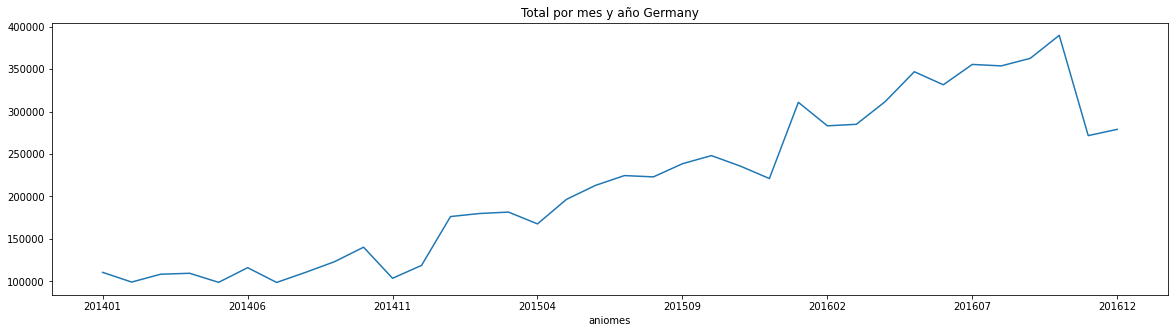

In [257]:
total_dataset_gm.Total.plot(figsize=(20,5), title = "Total por mes y año Germany")
plt.show()

C:\Users\hevas\anaconda3\envs\educacion\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



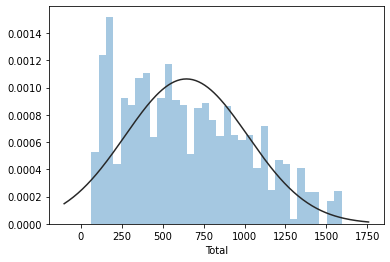

In [258]:
ax = sns.distplot(dataset['Total'], fit=norm, kde=False)

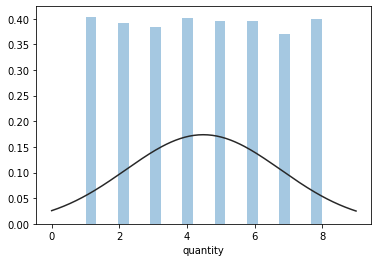

In [260]:
ax = sns.distplot(dataset['quantity'], fit=norm, kde=False)

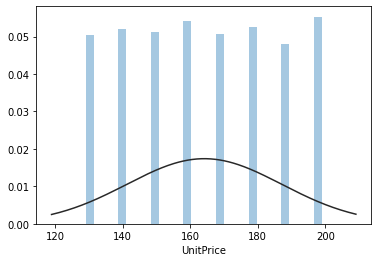

In [261]:
ax = sns.distplot(dataset['UnitPrice'], fit=norm, kde=False)

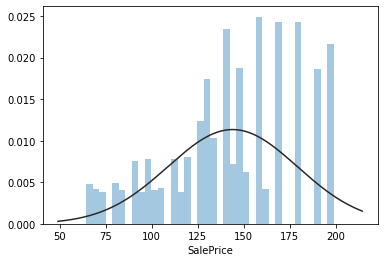

In [262]:
ax = sns.distplot(dataset['SalePrice'], fit=norm, kde=False)

<AxesSubplot:xlabel='Country', ylabel='Total'>

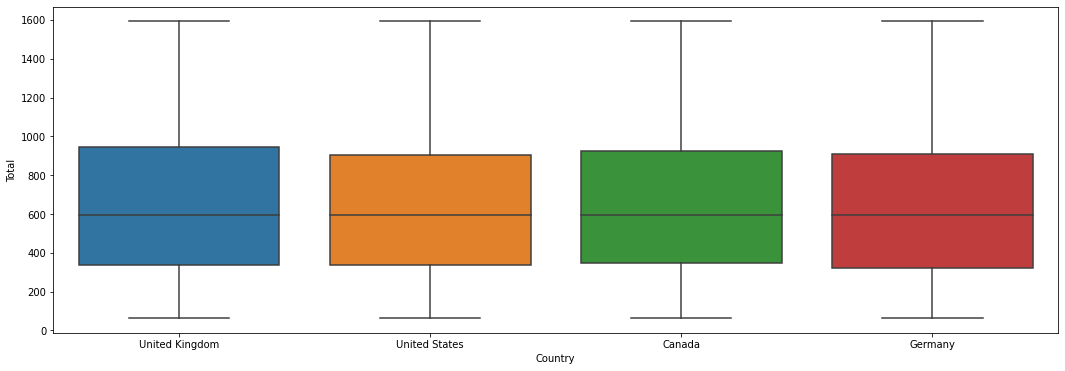

In [263]:
plt.figure(figsize=(18,6))
sns.boxplot(x="Country",y="Total", data=dataset)

<AxesSubplot:xlabel='Shop', ylabel='Total'>

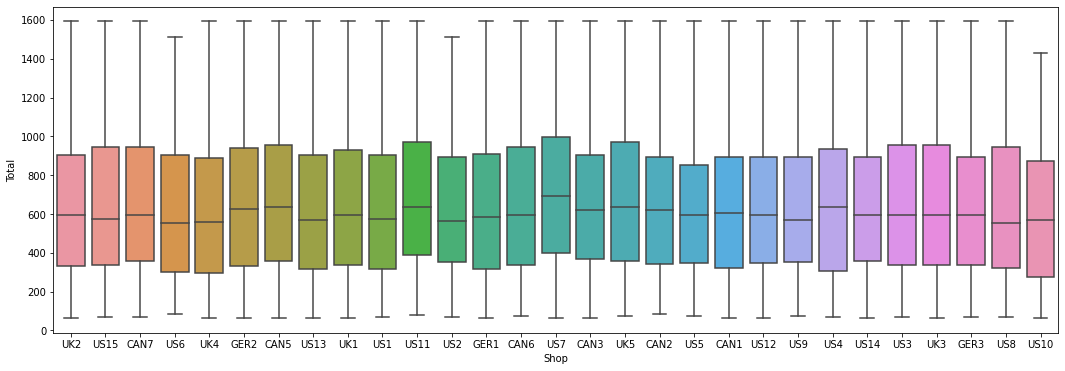

In [264]:
plt.figure(figsize=(18,6))
sns.boxplot(x="Shop",y="Total", data=dataset)

<AxesSubplot:xlabel='Year', ylabel='Total'>

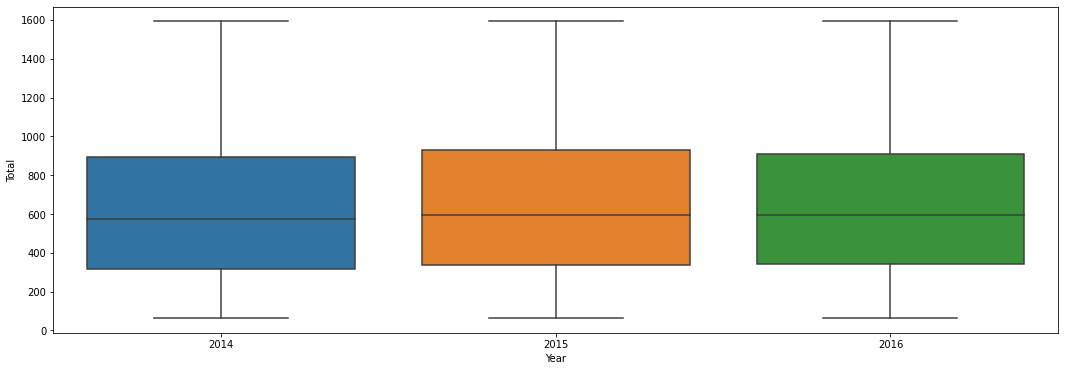

In [265]:
plt.figure(figsize=(18,6))
sns.boxplot(x="Year",y="Total", data=dataset)

<AxesSubplot:xlabel='Gender', ylabel='Total'>

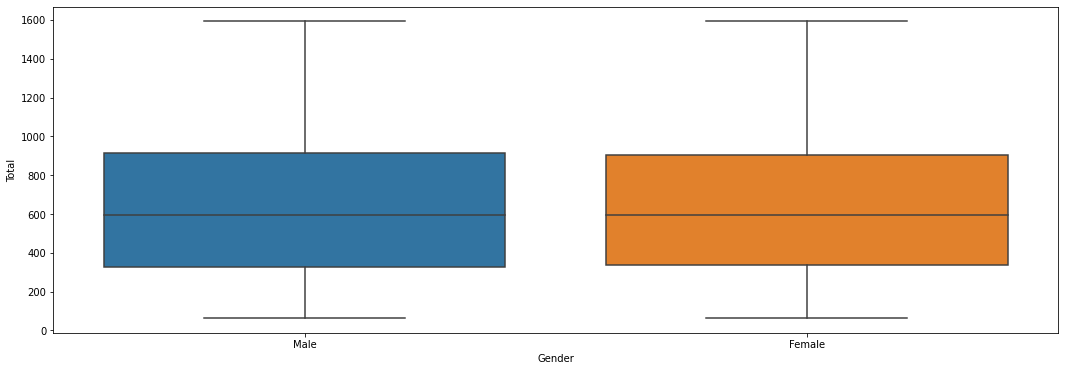

In [266]:
plt.figure(figsize=(18,6))
sns.boxplot(x="Gender",y="Total", data=dataset)

# Ingeniería de características

In [267]:
#creamos una copia del dataset para no sobreescribir la original
dataset_encoder = dataset

In [269]:
dataset_encoder

,InvoiceNo,Country,ProductID,customerID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice,quantity,Total,aniomes,anio,codfecha,trimestre
Date,,,,,,,,,,,,,,,,,,,,
2014-01-01,52389,United Kingdom,2152,6464,UK2,Male,11.0,37,10.5,159,0.0,2014,1,159.0,7,1113.0,201401,2014,20140101,1
2014-01-01,52390,United States,2230,8994,US15,Male,11.5,35,11.0,199,0.2,2014,1,159.2,7,1114.4,201401,2014,20140101,1
2014-01-01,52391,Canada,2160,7247,CAN7,Male,9.5,43,9.0,149,0.2,2014,1,119.2,2,238.4,201401,2014,20140101,1
2014-01-01,52392,United States,2234,8721,US6,Female,9.5,38,7.5,159,0.0,2014,1,159.0,8,1272.0,201401,2014,20140101,1
2014-01-01,52393,United Kingdom,2222,5162,UK4,Female,9.0,36,7.0,159,0.0,2014,1,159.0,1,159.0,201401,2014,20140101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31,65773,United Kingdom,2154,3269,UK2,Male,9.5,42,9.0,139,0.0,2016,12,139.0,5,695.0,201612,2016,20161231,4
2016-12-31,65774,United States,2181,6622,US12,Female,12.0,40,10.0,149,0.0,2016,12,149.0,3,447.0,201612,2016,20161231,4
2016-12-31,65775,Canada,2203,8382,CAN6,Male,10.5,36,10.0,179,0.3,2016,12,125.3,5,626.5,201612,2016,20161231,4


In [270]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

dataset_encoder['Country'] = ord_enc.fit_transform(dataset_encoder[['Country']])
dataset_encoder['Shop']    = ord_enc.fit_transform(dataset_encoder[['Shop']])
dataset_encoder['Gender']  = ord_enc.fit_transform(dataset_encoder[['Gender']])

In [271]:
dataset_encoder

,InvoiceNo,Country,ProductID,customerID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice,quantity,Total,aniomes,anio,codfecha,trimestre
Date,,,,,,,,,,,,,,,,,,,,
2014-01-01,52389,2.0,2152,6464,10.0,1.0,11.0,37,10.5,159,0.0,2014,1,159.0,7,1113.0,201401,2014,20140101,1
2014-01-01,52390,3.0,2230,8994,20.0,1.0,11.5,35,11.0,199,0.2,2014,1,159.2,7,1114.4,201401,2014,20140101,1
2014-01-01,52391,0.0,2160,7247,5.0,1.0,9.5,43,9.0,149,0.2,2014,1,119.2,2,238.4,201401,2014,20140101,1
2014-01-01,52392,3.0,2234,8721,25.0,0.0,9.5,38,7.5,159,0.0,2014,1,159.0,8,1272.0,201401,2014,20140101,1
2014-01-01,52393,2.0,2222,5162,12.0,0.0,9.0,36,7.0,159,0.0,2014,1,159.0,1,159.0,201401,2014,20140101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31,65773,2.0,2154,3269,10.0,1.0,9.5,42,9.0,139,0.0,2016,12,139.0,5,695.0,201612,2016,20161231,4
2016-12-31,65774,3.0,2181,6622,17.0,0.0,12.0,40,10.0,149,0.0,2016,12,149.0,3,447.0,201612,2016,20161231,4
2016-12-31,65775,0.0,2203,8382,4.0,1.0,10.5,36,10.0,179,0.3,2016,12,125.3,5,626.5,201612,2016,20161231,4


In [281]:
dataset_encoder.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14967 entries, 2014-01-01 to 2016-12-31
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InvoiceNo      14967 non-null  int64  
 1   Country        14967 non-null  float64
 2   ProductID      14967 non-null  int64  
 3   customerID     14967 non-null  int64  
 4   Shop           14967 non-null  float64
 5   Gender         14967 non-null  float64
 6   Size (US)      14967 non-null  float64
 7   Size (Europe)  14967 non-null  int64  
 8   Size (UK)      14967 non-null  float64
 9   UnitPrice      14967 non-null  int64  
 10  Discount       14967 non-null  float64
 11  Year           14967 non-null  int64  
 12  Month          14967 non-null  int64  
 13  SalePrice      14967 non-null  float64
 14  quantity       14967 non-null  int64  
 15  Total          14967 non-null  float64
 16  aniomes        14967 non-null  object 
 17  anio           14967 non-null  ob

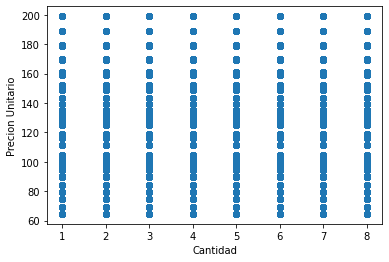

In [272]:
plt.scatter(dataset['quantity'], dataset['SalePrice'])
plt.xlabel("Cantidad")
plt.ylabel("Precion Unitario")
plt.show()

In [274]:
matriz_correlacion = dataset_encoder.corr()
matriz_correlacion

,InvoiceNo,Country,ProductID,customerID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice,quantity,Total,trimestre
InvoiceNo,1.000000,0.025333,0.003446,-0.002752,0.007582,0.007286,-0.011095,0.002446,-0.005791,-0.019302,0.008923,0.909878,0.352655,-0.016736,0.026426,0.016894,0.203700
Country,0.025333,1.000000,0.004837,-0.000756,0.933994,-0.032238,-0.025138,0.002393,-0.031336,-0.017409,-0.010400,0.024410,0.000560,-0.001839,-0.013888,-0.012185,0.003339
ProductID,0.003446,0.004837,1.000000,-0.000111,0.003870,-0.018323,-0.030131,0.004168,-0.029968,0.029623,0.006011,0.008498,-0.010678,0.012046,-0.021550,-0.014570,-0.013222
customerID,-0.002752,-0.000756,-0.000111,1.000000,0.000440,-0.004512,0.000189,-0.020046,-0.001541,-0.000381,0.005267,-0.003105,0.006734,-0.003344,0.006668,0.003052,0.003108
Shop,0.007582,0.933994,0.003870,0.000440,1.000000,-0.029961,-0.021937,0.003969,-0.028029,-0.012450,-0.017593,0.006496,-0.007247,0.007501,-0.014014,-0.009427,-0.000271
Gender,0.007286,-0.032238,-0.018323,-0.004512,-0.029961,1.000000,0.473513,-0.000468,0.737008,-0.009339,0.001224,0.004119,0.010713,-0.005177,-0.009209,-0.007337,0.000543
Size (US),-0.011095,-0.025138,-0.030131,0.000189,-0.021937,0.473513,1.000000,-0.004627,0.944293,-0.020793,-0.011721,-0.016028,0.002577,-0.001599,-0.013286,-0.010247,0.002855
Size (Europe),0.002446,0.002393,0.004168,-0.020046,0.003969,-0.000468,-0.004627,1.000000,-0.003726,0.008891,0.004917,0.007262,-0.009382,0.001002,-0.004945,-0.005272,-0.007821
Size (UK),-0.005791,-0.031336,-0.029968,-0.001541,-0.028029,0.737008,0.944293,-0.003726,1.000000,-0.019445,-0.008537,-0.010760,0.005981,-0.003161,-0.013636,-0.010605,0.002393
UnitPrice,-0.019302,-0.017409,0.029623,-0.000381,-0.012450,-0.009339,-0.020793,0.008891,-0.019445,1.000000,-0.045075,-0.021188,0.008345,0.605639,-0.003120,0.254004,-0.000722


<AxesSubplot:>

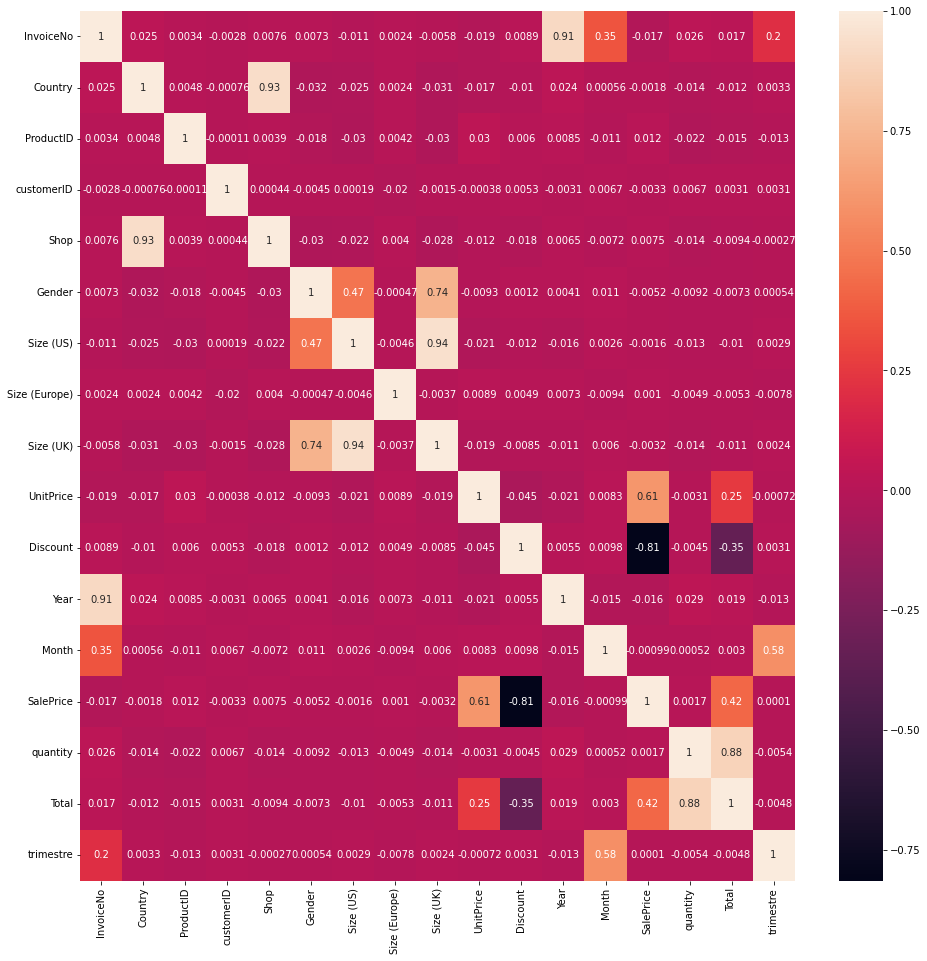

In [278]:
plt.figure(figsize=(16,16))
sns.heatmap(matriz_correlacion, annot=True)

# K-means

In [283]:
kmeans_customer = dataset_encoder.groupby('customerID').agg({'Total': ['mean', 'sum', 'max']})
kmeans_customer = pd.DataFrame(kmeans_customer)
kmeans_customer.columns = ['Mean', 'Sum', 'Max']
kmeans_customer.head()

,Mean,Sum,Max
customerID,,,
1545,1079.800000,2159.6,1145.6
1546,954.000000,954.0,954.0
1547,453.933333,1361.8,625.5
1548,696.500000,696.5,696.5
1549,213.466667,640.4,398.0


In [285]:
kmeans_customer.shape

(6773, 3)

# Estandarización de Variables

In [287]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(kmeans_customer.values)
scaled_features

array([[ 1.49166741,  0.77104492,  0.81253392],
       [ 1.06131163, -0.49731981,  0.30415682],
       [-0.64939253, -0.06828934, -0.5674605 ],
       ...,
       [-0.61495495, -0.03651709, -0.22120156],
       [ 0.74795241,  0.3136088 ,  0.91176828],
       [ 1.11433639,  0.53896027,  0.91176828]])

In [288]:
Ks = range(1, 11)
variabilidad = []

for k in Ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_features)
    variabilidad.append(model.inertia_)

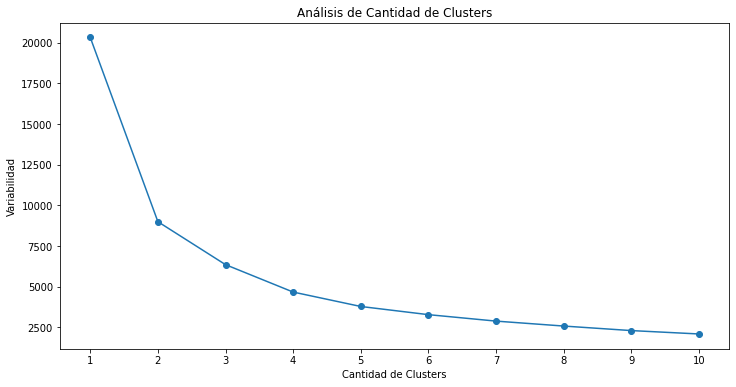

In [289]:
plt.figure(figsize=(12, 6))
plt.plot(Ks, variabilidad, '-o')
plt.title("Análisis de Cantidad de Clusters")
plt.xlabel("Cantidad de Clusters")
plt.ylabel("Variabilidad")
plt.xticks(Ks)
plt.show()

# Modelo KMeans con K = 3

In [290]:
MODEL = KMeans(n_clusters=3)
MODEL.fit(scaled_features)

KMeans(n_clusters=3)

In [292]:
kmeans_customer['Cluster'] = MODEL.predict(scaled_features)
kmeans_customer.head()

,Mean,Sum,Max,Cluster
customerID,,,,
1545,1079.800000,2159.6,1145.6,0
1546,954.000000,954.0,954.0,2
1547,453.933333,1361.8,625.5,2
1548,696.500000,696.5,696.5,2
1549,213.466667,640.4,398.0,1


In [293]:
fig = px.scatter_3d(data_frame = kmeans_customer, x='Max', y='Mean', z='Sum', color='Cluster')

fig.show()

# PCA - Principal Component Analysis

In [294]:
from sklearn.decomposition import PCA

In [295]:
pca = PCA(n_components = 3)

In [306]:
#eliminamos las columnas que no seran utilizadas en el dataset
#dataset_encoder.drop(['InvoiceNo'], axis='columns', inplace=True)
#dataset_encoder.drop(['Date'], axis='columns', inplace=True)
#dataset_encoder.drop(['ProductID'], axis='columns', inplace=True)
#dataset_encoder.drop(['Size (Europe)'], axis='columns', inplace=True)
#dataset_encoder.drop(['aniomes'], axis='columns', inplace=True)
#dataset_encoder.drop(['anio'], axis='columns', inplace=True)
#dataset_encoder.drop(['codfecha'], axis='columns', inplace=True)
#convertir object a int
dataset_encoder['aniomes']  = dataset_encoder['aniomes'].astype(str).astype('int64')
dataset_encoder['anio']     = dataset_encoder['anio'].astype(str).astype('int64')
dataset_encoder['codfecha'] = dataset_encoder['codfecha'].astype(str).astype('int64')

In [308]:
train_pca = pca.fit_transform(dataset_encoder)

In [309]:
pca.explained_variance_ratio_

array([0.90545998, 0.06835603, 0.02436496])

In [310]:
np.sum(pca.explained_variance_ratio_)

0.998180968791634

In [311]:
np.round(pca.components_, 2)

array([[-0.44, -0.  , -0.  ,  0.  , -0.  , -0.  ,  0.  , -0.  ,  0.  ,
         0.  , -0.  , -0.  , -0.  ,  0.  , -0.  , -0.  , -0.01, -0.  ,
        -0.9 , -0.  ],
       [-0.  ,  0.  ,  0.  , -1.  , -0.  ,  0.  , -0.  ,  0.  ,  0.  ,
         0.  , -0.  , -0.  , -0.  ,  0.  , -0.  , -0.  , -0.  , -0.  ,
        -0.  , -0.  ],
       [-0.9 , -0.  ,  0.  ,  0.  , -0.  , -0.  , -0.  ,  0.  , -0.  ,
        -0.  , -0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.44, -0.  ]])

In [345]:
train_pca

array([[15201.93918763,  -896.45269552,    35.53054528],
       [15203.74302297, -3426.45240698,    35.16002984],
       [15202.47140393, -1679.00359046,    33.4965742 ],
       ...,
       [-9649.43580086, -2836.77845846, -2794.61680365],
       [-9649.12451956, -3830.86198468, -2795.2270372 ],
       [-9651.76730375,  -958.6510956 , -2796.91911908]])

In [353]:
df_pca = pd.DataFrame(train_pca,columns=['componente1','componente2','componente3'])
#dataset_encoder = dataset_encoder.reset_index()
#df_pca['customerID'] = dataset_encoder['customerID']
df_pca

,componente1,componente2,componente3
0,15201.939188,-896.452696,35.530545
1,15203.743023,-3426.452407,35.160030
2,15202.471404,-1679.003590,33.496574
3,15202.497815,-3153.535199,33.377679
4,15199.819271,406.037077,31.253550
...,...,...,...
14962,-9653.148091,2276.185134,-2793.832655
14963,-9650.411441,-1076.684992,-2794.156631
14964,-9649.435801,-2836.778458,-2794.616804
14965,-9649.124520,-3830.861985,-2795.227037


In [343]:
df_pca[Customer_id]

(14967, 4)

# K MEANS - PCA

In [334]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_pca.values)
scaled_features

array([[ 1.7995555 , -0.38622453,  0.02564011],
       [ 1.79976903, -1.47624072,  0.02537273],
       [ 1.7996185 , -0.72337601,  0.02417232],
       ...,
       [-1.14226843, -1.22218767, -2.01669525],
       [-1.14223159, -1.65047513, -2.01713561],
       [-1.14254443, -0.41302187, -2.01835668]])

In [335]:
train_pca

array([[15201.93918763,  -896.45269552,    35.53054528],
       [15203.74302297, -3426.45240698,    35.16002984],
       [15202.47140393, -1679.00359046,    33.4965742 ],
       ...,
       [-9649.43580086, -2836.77845846, -2794.61680365],
       [-9649.12451956, -3830.86198468, -2795.2270372 ],
       [-9651.76730375,  -958.6510956 , -2796.91911908]])

In [336]:
Ks = range(1, 11)
variabilidad = []

for k in Ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_features)
    variabilidad.append(model.inertia_)

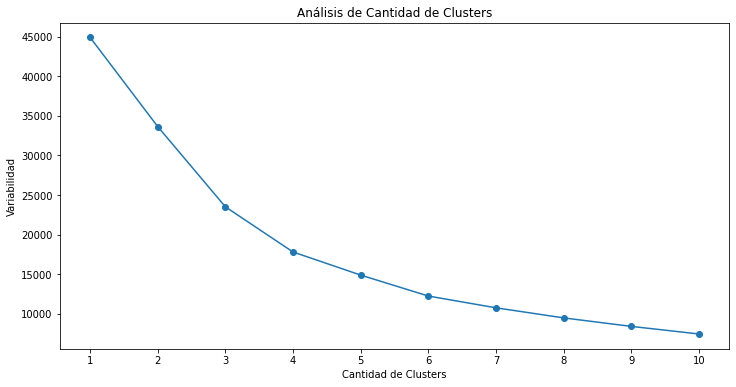

In [337]:
plt.figure(figsize=(12, 6))
plt.plot(Ks, variabilidad, '-o')
plt.title("Análisis de Cantidad de Clusters")
plt.xlabel("Cantidad de Clusters")
plt.ylabel("Variabilidad")
plt.xticks(Ks)
plt.show()

In [338]:
MODEL = KMeans(n_clusters=3)
MODEL.fit(scaled_features)

KMeans(n_clusters=3)

In [339]:
df_pca['Cluster'] = MODEL.predict(scaled_features)
df_pca.head()

,componente1,componente2,componente3,Cluster
0,15201.939188,-896.452696,35.530545,1
1,15203.743023,-3426.452407,35.160030,1
2,15202.471404,-1679.003590,33.496574,1
3,15202.497815,-3153.535199,33.377679,1
4,15199.819271,406.037077,31.253550,1


In [341]:
fig = px.scatter_3d(data_frame = df_pca, x='componente1', y='componente2', z='componente3', color='Cluster')

fig.show()